<img src="https://github.com/i3hsInnovation/resources/blob/master/images/introbanner.png?raw=true" />

<table style="float:right" width="50%">
    <tr>
        <td>                      
            <div style="text-align: left"><a href="" target="_blank">Dr Peter Causey-Freeman</a></div>
            <div style="text-align: left">Lecturer - Healthcare Sciences</div>
            <div style="text-align: left">(Clinical Bioinformatics)</div>
            <div style="text-align: left">The University of Manchester</div>
         </td>
         <td>
             <img src="https://github.com/i3hsInnovation/resources/blob/master/images/pete.001.png?raw=true" width="40%" />
         </td>
     </tr>
</table>

# Introduction to SPRINT 2
***

### About this Notebook

This notebook sets out the instructions for the second sprint.


This notebook is at <code>Beginner</code> level and with all team activities will take approximately 7 hours to complete.

<b><h2>Contents</h2></b>  

#### [Re-annotation of Ensembl variants](#e2r)

1 [User Story Summary](#urecap)

2 [Project Outline](#outline)

3 [Recommended APIs](#apis)

4 [Discussion Topics](#disc)

5 [Accessing Additional Information](#info)

6 [Assessed Work](#practical)

<div class="alert alert-block alert-warning"><b>Learning Objective:</b> Planning and executing the development of a programming project</div>

<a id="e2r"></a>
<table width="100%" style="float:left">
    <tr>
        <td width="60%" style="text-align: left">
            <h1>Re-annotation of Ensembl variants</h1>
        </td>
        <td width="40%">
            <img src="https://github.com/i3hsInnovation/resources/blob/master/images/rve.png?raw=true" width="100%"/>
        </td>
    </tr>
</table> 

***
<sup>Image by Terence Murphy [Mane v2 Final](https://www.slideshare.net/GenomeRef/mane-v2-final)</sup>

<a id="urecap"></a>

## 1 User Story Summary


### Genomics England LTD variant annotations

Genomics England LTD (GEL) annotate variants in the context of Ensembl reference sequences. Variants are annotated using GEL's [Cellbase](http://bioinfo.hpc.cam.ac.uk/cellbase/webservices/#/) APIs. Although the annotation pipeline is very fast and the level of annotation is extremely detailed, the outputs returned to NHS clinical geneticists are not in a format suitable for use in a clinical setting:

1. Current guidelines for the [interpretation of seqence variants](https://www.nature.com/articles/gim201530) require variants to be described and annotated in the context of RefSeq transcripts.


2. The above guidelines recommend the use of the [HGVS variant nomenclature](http://varnomen.hgvs.org/) which currently do not allow the use of Ensembl reference sequences (This will, however, soon change - see discussion topics).


3. Transcript reference sequence IDs provided are incomplete (lack the necessary version number), so care must be taken when mapping variation between reference sequences


### User requirements
Simon Boardman has been tasked with creating a user-friendly REST API that expert bioinformaticians and clinical geneticists alike can use and understand. He has asked me to incorporate this functionality into VariantValidator. As the lead developer on this project I am tasking your team with creating this resource. 

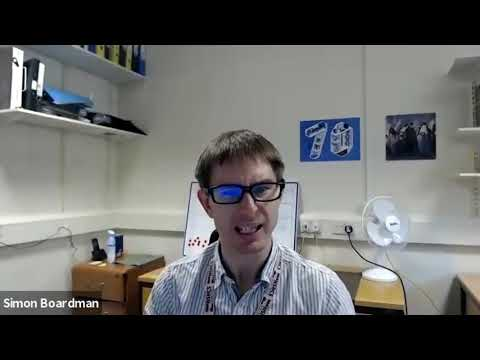

In [1]:
from IPython.display import YouTubeVideo
# Youtube
YouTubeVideo('Uu1Oga9MaJI', width=560, height=315)

The primary focus of the API must be to accept GEL variant descriptions and provide valid and accurate genome, transcript and protein variant descriptions.
   - The descriptions must be accurately formatted in accordance with the HGVS guidelines, in the context of suitable RefSeq reference sequences. 
   - Genomic variants must also be described using a genome coordiante based system and [SPDI](https://www.biorxiv.org/content/10.1101/537449v1) to enable efficient cross-referencing with resources such as [ExAC](https://pic-sure.org/products/exac-restful-api), [gnomAD](https://gnomad.broadinstitute.org/), [dbSNP](https://rest.ensembl.org/documentation/info/vep_hgvs_get) and [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/docs/maintenance_use/#api).
   - All HGVS variant deacriptions must be validated using a recognised high-quality variant descriprion validation tool. 

After discussing the requirements of the tool with the lead bioinformatician, it is apparant that it would also be highly desireable to provide well-considered variant annotation for the variants once they are formatted in the conext of RefSeq refernce sequences. 

[Project Outline](#outline)

<a id="outline"></a>

## 2 Project outline


### Project direction

**Referring to the project blueprint below**
 
 - Create a Python module in the directory **SPRINT**. In the module, create a function which gathers information from REST APIs and returns the data as a Python dictionary
     - **Project minimum requirement** accept an Ensembl transcript variant description lacking the version number, and return genomic, transcript and protein HGVS in the context of RefSeq reference sequences, a "deconstructed" genome coordinate based variant description and an SPDI genomic variant description.
     - Add this function and any subsequent functions) to the API and create the relevant Endpoints. Remember, you will need to create a new namespace!
     
     
 - If time permits, add a function which adds variant annotation capability to your module
 
 
 - If time permits, add error handling to your Endpoints
 
 
 - If time permits, add additional data such as relevant ClinVar annotations (best searched using SPDI).
 
### Project blueprint
***As lead developer on this project, this is the general structure I require to ensure the tool remains expandable and maintainable***
 
<img src="https://github.com/i3hsInnovation/resources/blob/master/images/sprint_blue.png?raw=true" width="80%" />

***
<sup>Image by Peter Causey-Freeman</sup>

#### Endpoints
You will see from the bluprint that two functions are required (as described above) which can be converted into Endpoints.

##### 1. Transcript to genome
The only **"safe"** way to map from one transcript descriotion to another is via a stable genomic or gene sequence to which all the transcripts are aligned. We are not considering gene-level descriptions, so these can be ignored!

**This endpoint is not intended to return any data**. It should be used as an entry-point which triggers the next endpoint. In the context of an API, this can be achieved using Flask's [url_for()](https://flask.palletsprojects.com/en/1.0.x/quickstart/) method

##### 2. Descriptions (and annotation)
The **"safest"** way to collect additional data, such as SPDI descriptions and annotations is via an accurate and correctly formatted genomic description.   

[Return to top](#e2r)

-------------

<a id="apis"></a>

## 3 Recommended APIs


### Ensembl REST API

[Endpoints](https://rest.ensembl.org) with links to documentation

### Variant annotations and Ensembl HGVS
Ensembl Variant Effect Predictor (VEP) - [VEP REST API Endpoint documentation](https://rest.ensembl.org/documentation/info/vep_hgvs_get)

### RefSeq HGVS, genome coordinates and stable gene IDs
[VariantValidator REST API](https://rest.variantvalidator.org/webservices/variantvalidator.html)

### Ensembl  HGVS to genomic HGVS and SPDI

Ensembl Variant Recoder - [Variant Recoder REST API Endpoint documetation](https://rest.ensembl.org/documentation/info/variant_recoder)

### Stable gene IDs, gene names and gene symbols
[genenames.org REST API](https://www.genenames.org/help/rest/)

[Return to top](#e2r)


------------------------

<a id="disc"></a>

## 4 Discussion topics


### When planning the build of your tool, consider the following:

#### 1. Trannscript level inputs

What are your users likely to want:
- Ensembl transcript variant input?
    - With or without version numbers?
- RefSeq transcript variant input?
- What if they want to replace the reference sequence ID with a gene symbol? 
    - How do the tools handle this?
    - Will you need to provide any additional guidance
- What happens if a user provides a description that cannot be converted into a genomic description?

#### 2.  Projection onto a genome

Other than a variant description, what additional information will you need to project the variant onto a genomic reference sequence?


#### 3. Annotation genomic variants

- How do the recommended tools handle intergenic variants (*i.e.* genomic variants that do not project onto any transcripts)?
- Will you provide any annotation for these variants?
- What happens if a provided variant description cannot be handled by the tools?


#### 4. Transcript source

You will display annotations in the context of [RefSeq](https://rest.ensembl.org/vep/human/hgvs/NC_000017.11:g.50198002C%3EA?content-type=application/json;refseq=True;hgvs=True;dbscSNV=True;variant_class=True;Blosum62=True;Conservation=True;ccds=True;dbNSFP=REVEL_score) transcripts only.

Take a look at this output and how the URL is constructed. 

#### 5. Data quality

- You will generate HGVS descriptions from both VEP and VariantValidator. Perhaps consider showing an output and a validation (*i.e.* this is what VEP says, and this is what VariantValidator has to say about it!)
- Will you include annotations in the context of [model and incomplete transcripts](http://varnomen.hgvs.org/bg-material/consultation/svd-wg008/)?
- How do you identify model transcripts in the VEP output?
- What is the most reliable source of a particular annotation *i.e.* VEP is a tool built on genome annotation data based on Ensembl annotations, is it the best source for RefSeq nomenclature annotations?
- How will your decisions affect VEP's prediction of the most severe consequence, and will you keep this information?


#### 6. Data quantity

Your output **must include**
- refseq=True (Returns RefSeq formatted data)
- dbscSNV=True
- dbNSFP=REVEL_score
- variant_class=True
- Conservation=True
- ccds=True

These are described in the [VEP REST API Endpoint documentation](https://rest.ensembl.org/documentation/info/vep_hgvs_get) 

Other than those I have requested, which other VEP options will you switch on?
- Why?
- Do the returned data appear correct?
- How will you remove any annotations that you do not want to return?

#### 7. Data source
It is good practice to show the sources of your data. Think about how you can display URLs for the APIs you have visited to collate the data. This will allow other to re-produce the data you are displaying.

[Return to top](#e2r)


-----------------------------------

<a id="info"></a>

## 5 Accessing Additional Information


[Ensembl helpdesk](https://www.ensembl.org/Multi/Help/Search?db=core)
- Includes online content such as tutorials and FAQs
- Contact web-form provided


[VariantValidator contact admin](https://variantvalidator.org/contact_admin/)
- Guidance on how to use the tools and nomenclature issues

[VariantValidator issues](https://github.com/openvar/variantValidator/issues)
- Bug reporting and feature requests

[genenames.org help](https://www.genenames.org/contact/feedback/)
- No specific guidance on the help available

[Python requests module](https://2.python-requests.org/en/master/)
- User-guide and links to the GitHub repo for bug reporting and feature requests


[Return to top](#e2r)

----------

## Assessed Work

<a name="practical"></a>

### Over to you

#### Aim of this exercise
The aim of this exercise is to provide your team with experience of delivering a product to a Product owner (*i.e.* me as the lead developer of VariantValidator).

This will be an iterative process and you will need to communicate with me and my facilitators through Git Issues and Slack

#### Structure your team
Assign your team roles:

1. **Project lead**
    - This is my role as the product owner
    - I have introduced the project in this notebook, and have specified the minimum requirement of the project
    - Before you begin, you will need to raise a Git Issue so we can plan the first iteration

<br>

2. **Team lead**
    - Initiate the development process on Git Issues
    - Liaise with the project lead and the wider team
    - Lead the group discussion in Git Issues and Slack
    - Provide final feedback to the project lead on the group's activities and close the issue once the project lead has accepted each iteration of the overall project. 

<br>

2. **Team members**
    - Coders who will be responsible for writing the Python functions
    - Testers who will be responsible for testing the code and providing feedback to the coders and the team/project leads

<br>

***We recommend ensuring that you most experienced coders work with your least experienced coders. Don't forget, this is a team assignment, if you can't figure out how to do something, ask your team on Slack!***

<img src="https://github.com/i3hsInnovation/resources/blob/master/images/Discussionsummative.png?raw=true" width="25%"/>

### Work-flow

1. Team leader creates an issue on Git Issues to begin the first iteration of the project
2. The project lead will join the discussion on Git Issues/Slack
3. The coders will work together to write the module and link it to the API
4. The testers will review the final code and test the code. Feedback will be given to the coders within the Git issue and Slack
5. Once the coding is completed and tested, the team lead will summarise the key work-flow points and ask the project lead to review and accept the code. If the code is accepted, move on to the next iteration (repeat these steps), or continue to develop the code until the project lead is happy
5. Once all iterations we have time for are complete, the team lead will create a pull request and the project lead will merge the code into master 

**Details about how the assignment will be marked can be found [here](LINK)**

<a id="sum"></a>

<b><h2>Summary</h2></b>  
</div>

After completing this coding project, you will have gained some experience in working as part of a development team. Many open source bioinformatics tools are developed in this way. There will be one person who leads the project (for many smaller projects, this person may be the only person working on the project, but will still work in a similar way). There may also be other coders who develop new functions or debug the existing code. Once the code is developed/debugged, the code will be reviewed by the project owner and merged into the master repository if the project lead is happy with it. 

-----

#### Notebook details
<br>
<i>Notebook created by <strong>Dr. Pete Causey-Freeman</strong> with <strong>Frances Hooley</strong> 
    

Publish date: October 2020<br>
Review date: October 2021</i>

Please give your feedback using the button below:

<a class="typeform-share button" href="https://form.typeform.com/to/YMpwLTNy" data-mode="popup" style="display:inline-block;text-decoration:none;background-color:#3A7685;color:white;cursor:pointer;font-family:Helvetica,Arial,sans-serif;font-size:18px;line-height:45px;text-align:center;margin:0;height:45px;padding:0px 30px;border-radius:22px;max-width:100%;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;font-weight:bold;-webkit-font-smoothing:antialiased;-moz-osx-font-smoothing:grayscale;" target="_blank">Rate this notebook </a> <script> (function() { var qs,js,q,s,d=document, gi=d.getElementById, ce=d.createElement, gt=d.getElementsByTagName, id="typef_orm_share", b="https://embed.typeform.com/"; if(!gi.call(d,id)){ js=ce.call(d,"script"); js.id=id; js.src=b+"embed.js"; q=gt.call(d,"script")[0]; q.parentNode.insertBefore(js,q) } })() </script>
